In [2]:
from cmb.configs.utils import Configs
from cmb.datasets.jetclass import JetDataclass

config = Configs('epic_dq_cfm.yaml') 
jets = JetDataclass(config.data, task='train')

INFO: created experiment instance GaussNoise_to_JetClass_FlowMatching_EPiC_2024.10.16_11h18_502


/home/df630/CMB/src/cmb/datasets/utils.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  discrete = torch.tensor(discrete).long()


## JetClass data

In [3]:
(jets.target.continuous.shape, 
jets.source.continuous.shape, 
jets.target.discrete.shape,
jets.source.discrete.shape,  
jets.target.mask.shape,
jets.source.mask.shape)

(torch.Size([300000, 128, 3]),
 torch.Size([300000, 128, 3]),
 torch.Size([300000, 128, 6]),
 torch.Size([300000, 128, 6]),
 torch.Size([300000, 128, 1]),
 torch.Size([300000, 128, 1]))

AttributeError: PolyCollection.set() got an unexpected keyword argument 'mask'

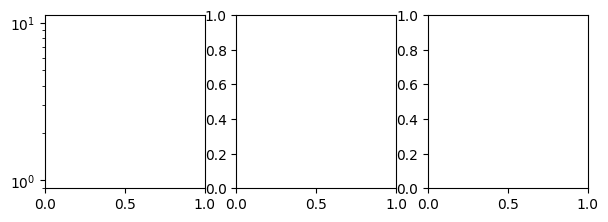

In [4]:
mask_target = (jets.target.mask > 0).squeeze() 
mask_source = (jets.source.mask > 0).squeeze() 

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(7,2.25))
jets.target.histplot('pt', mask=mask_target, ax=ax[0], stat='density', log_scale=(False,True), color='k', alpha=0.4, label='target')
jets.source.histplot('pt_rel', mask=mask_source, ax=ax[0], stat='density',  log_scale=(False,True), color='darkred', fill=False, lw=0.75, label='source')
jets.target.histplot('eta_rel', mask=mask_target, binrange=(-1,1), binwidth=0.02,ax=ax[1], stat='density',  color='k', alpha=0.2, label='target')
jets.source.histplot('eta_rel', mask=mask_source, binrange=(-1,1), binwidth=0.02, ax=ax[1], stat='density',  color='darkred', fill=False, lw=0.75, label='source')
jets.target.histplot('phi_rel', mask=mask_target, binrange=(-1,1), binwidth=0.02, ax=ax[2], stat='density', color='k', alpha=0.2, label='target')
jets.source.histplot('phi_rel', mask=mask_source, binrange=(-1,1), binwidth=0.02,ax=ax[2], stat='density',  color='darkred', fill=False, lw=0.75, label='source')
ax[0].legend(fontsize=6)
plt.tight_layout()
plt.show()

/home/df630/.conda/envs/flow_match_env/lib/python3.9/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(None, None)

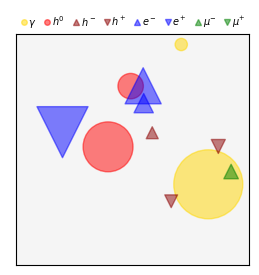

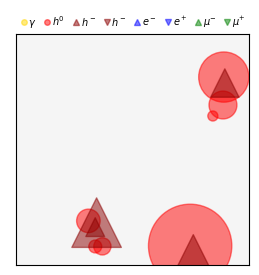

In [ ]:
jets.source.display_cloud(idx=10,  scale_marker=200.0), jets.target.display_cloud(idx=10,  scale_marker=200.0)


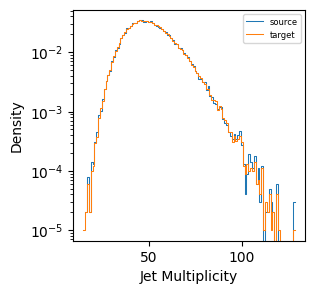

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(3,3))
sns.histplot(jets.source.multiplicity, element="step", fill=False, discrete=True, lw=0.75, stat='density', log_scale=(False, True),  ax=ax, label='source')
sns.histplot(jets.target.multiplicity, element="step", fill=False, discrete=True, lw=0.75, stat='density', log_scale=(False, True),  ax=ax, label='target')
ax.legend(fontsize=6)
ax.set_xlabel('Jet Multiplicity')
plt.show()

## Train CMB

In [ ]:
jets.target.continuous.shape, jets.source.continuous.shape, jets.target.discrete.shape, jets.source.discrete.shape, jets.target.mask.shape, jets.source.mask.shape

(torch.Size([100000, 128, 3]),
 torch.Size([100000, 128, 3]),
 torch.Size([100000, 128, 6]),
 torch.Size([100000, 128, 6]),
 torch.Size([100000, 128, 1]),
 torch.Size([100000, 128, 1]))

2024-10-12 10:44:23.931358: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-12 10:44:23.968141: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-12 10:44:23.968632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-12 10:44:24.741331: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO: Conditional Markov Bridge initialized...
      - continuous process:  FlowMatching
      - discrete process:  None
      - solver method:  EulerSolver
INFO: Preprocessing data...
    - continuous data: standardize
    - discrete data: onehot_dequantize


INFO: number of training parameters: 825526
INFO: start training...


INFO: building dataloaders...
INFO: train/val/test split ratios: 0.9/0.1/0.0
INFO: train size: 90000, validation size: 10000, testing sizes: 0


epochs:   0%|          | 0/10 [00:00<?, ?it/s]

/home/df630/.conda/envs/flow_match_env/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
	Epoch: 1, train loss: 8.585671836679632, valid loss: 7.228265047073364  (min valid loss: 7.228265047073364)


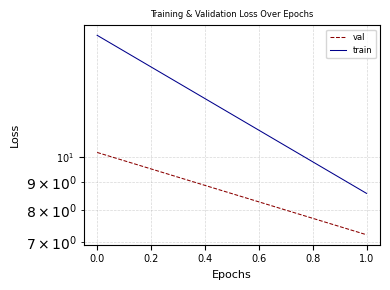

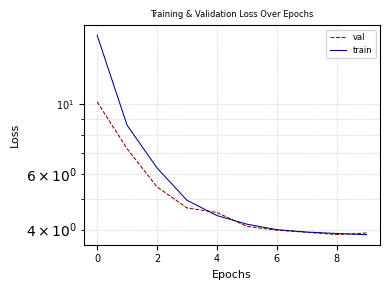

In [ ]:
from cmb.models.trainers import GenerativeDynamicsModule
epic_cmb = GenerativeDynamicsModule(config, jets)
epic_cmb.train()


# Inference

### load trained model

In [6]:
from cmb.models.trainers import GenerativeDynamicsModule

path='/home/df630/CMB/results/runs/jetclass_generation_CFM_final/GaussNoise_to_JetClass_FlowMatching_EPiC_2024.10.16_16h57_8986/config.yaml'
cfm = GenerativeDynamicsModule(config=path, device='cuda:0')
cfm.load(checkpoint='best')



INFO: Conditional Markov Bridge initialized...
      - continuous process:  FlowMatching
      - discrete process:  None
      - solver method:  EulerSolver
INFO: loading `best` epoch checkpoint on cuda:0 from:
  - /home/df630/CMB/results/runs/jetclass_generation_CFM_final/GaussNoise_to_JetClass_FlowMatching_EPiC_2024.10.16_16h57_8986/best_epoch.ckpt


### Generate data

In [7]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from cmb.datasets.jetclass import JetDataclass, ParticleClouds

num_jets = 30000
cfm.config.pipeline.num_timesteps=1000
test = JetDataclass(cfm.config.data, task='test', num_jets=num_jets)
test.source.preprocess(output_continuous=cfm.config.data.preprocess.continuous,
                       output_discrete=cfm.config.data.preprocess.discrete,
                       stats=cfm.config.data.source.train.stats.to_dict()
                       )

cfm.generate(source_continuous=test.source.continuous, 
             mask=test.source.mask,
             dataclass = ParticleClouds,
             output_history=False
             )       

INFO: generating samples...


## Plot results

In [8]:
from cmb.datasets.jetclass import JetClassHighLevelFeatures

data = JetClassHighLevelFeatures(cfm.sample)
test = JetClassHighLevelFeatures(test.target) 

from cmb.datasets.utils import flavor_to_onehot, states_to_flavor

def flavor_fracs(data: JetClassHighLevelFeatures):
    states = torch.argmax(flavor_to_onehot(data.constituents.flavor, data.constituents.charge.squeeze(-1)), dim=-1)
    mask = data.constituents.mask.squeeze(-1) > 0
    return states[mask]

gen_fracs = flavor_fracs(data)
test_fracs = flavor_fracs(test)

Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and E scheme recombination


Calculating N-subjettiness
Calculating D2
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and E scheme recombination
Calculating N-subjettiness
Calculating D2


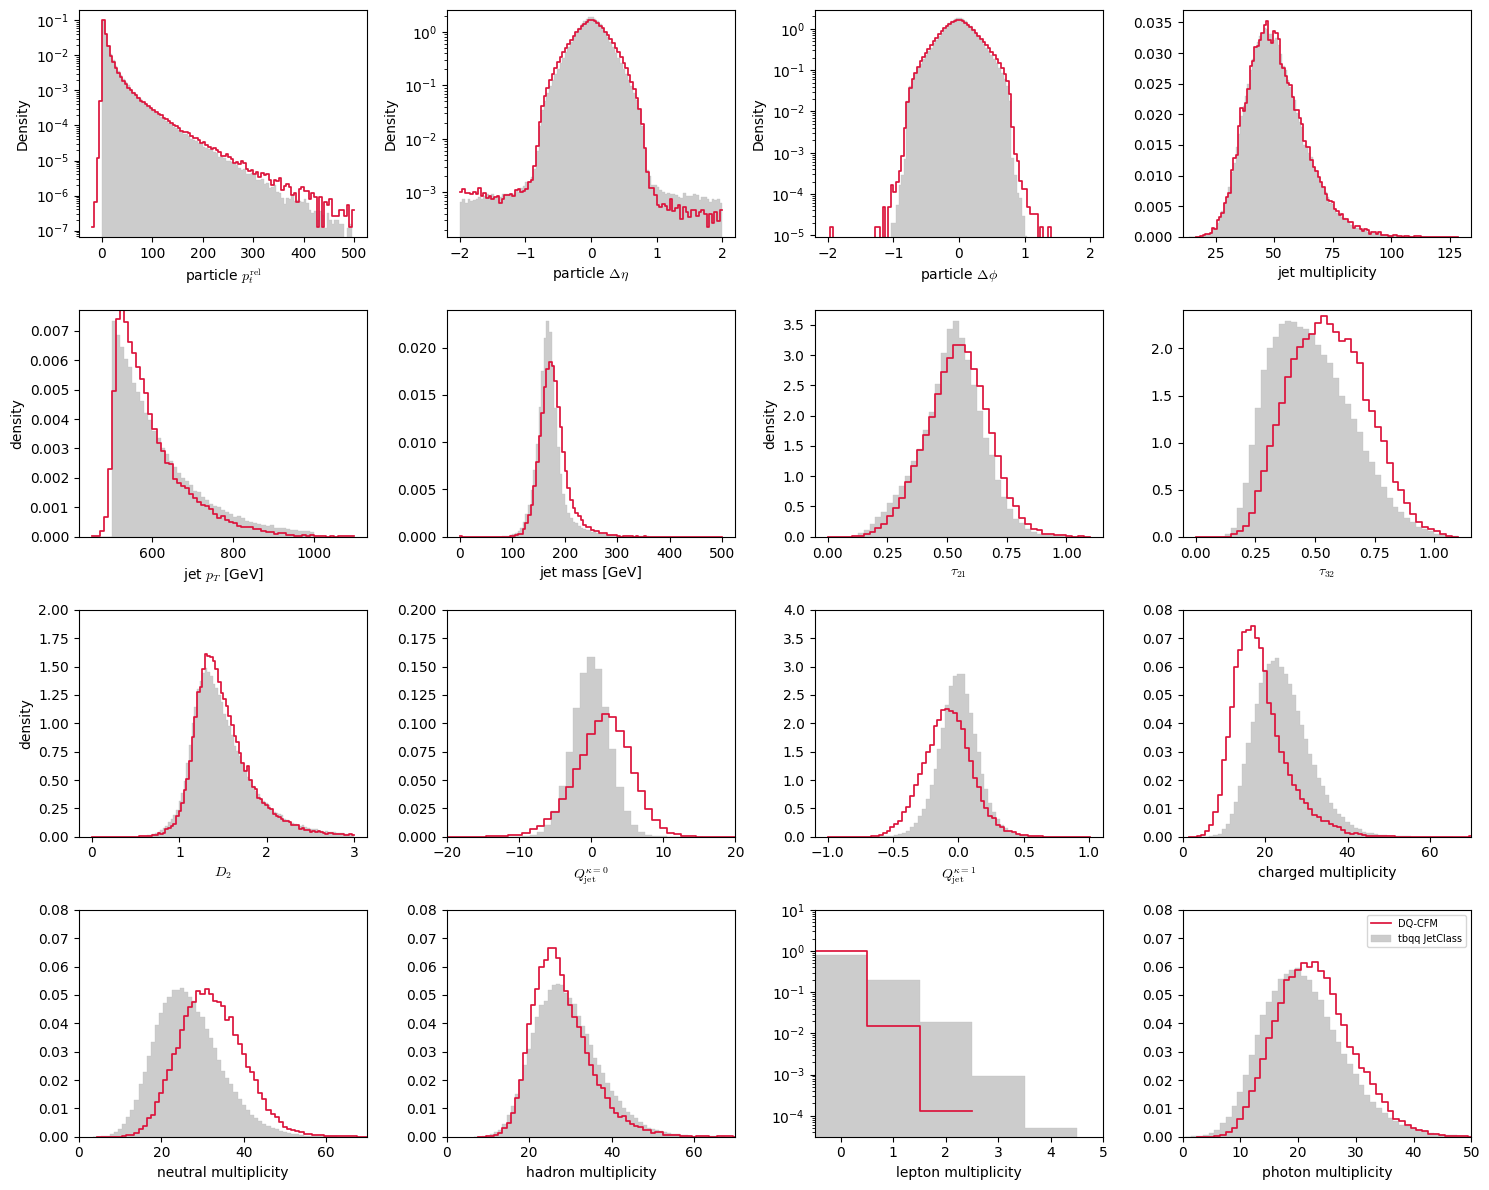

In [35]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(4,4,figsize=(15,12))

arg_test = dict(stat='density', fill=True, alpha=0.8, log_scale=(False, False), color='silver', lw=0.25, label='tbqq JetClass')
arg_gen = dict(stat='density', fill=False,log_scale=(False, False), color='crimson', lw=1.25,  label='DQ-CFM')
arg_test_log = dict(stat='density', fill=True, alpha=0.8, log_scale=(False, True), color='silver', lw=0.25, label='tbqq JetClass')
arg_gen_log = dict(stat='density', fill=False,log_scale=(False, True), color='crimson', lw=1.25,  label='DQ-CFM')


binrange, binwidth = (-20, 500), 5
data.constituents.histplot('pt', binrange=binrange, binwidth=binwidth, xlabel=r'particle $p_t^{\rm rel}$', ax=ax[0,0], **arg_gen_log)
test.constituents.histplot('pt', binrange=binrange, binwidth=binwidth, xlabel=r'particle $p_t^{\rm rel}$', ax=ax[0,0], **arg_test_log)

binrange, binwidth = (-2, 2), 0.04
data.constituents.histplot('eta_rel',  binrange=binrange, binwidth=binwidth, xlabel=r'particle $\Delta \eta$', ax=ax[0,1], **arg_gen_log)
test.constituents.histplot('eta_rel',  binrange=binrange, binwidth=binwidth, xlabel=r'particle $\Delta \eta$', ax=ax[0,1], **arg_test_log)

binrange, binwidth = (-2, 2), 0.04
data.constituents.histplot('phi_rel', binrange=binrange, binwidth=binwidth, xlabel=r'particle $\Delta \phi$', ax=ax[0,2], **arg_gen_log)
test.constituents.histplot('phi_rel', binrange=binrange, binwidth=binwidth, xlabel=r'particle $\Delta \phi$', ax=ax[0,2], **arg_test_log)

data.histplot_multiplicities(xlabel='jet multiplicity', ax=ax[0,3], **arg_gen)
test.histplot_multiplicities(xlabel='jet multiplicity', ax=ax[0,3], **arg_test)

# ------------------------------

binrange, binwidth = (450, 1100), 10
test.histplot('pt',  xlabel=r'jet $p_T$ [GeV]', ylabel='density', ax=ax[1,0], binrange=binrange, binwidth=binwidth, **arg_test)
data.histplot('pt',  xlabel=r'jet $p_T$ [GeV]', ylabel='density', ax=ax[1,0], binrange=binrange, binwidth=binwidth, **arg_gen)

binrange, binwidth = (0, 500), 5
test.histplot('m',  xlabel=r'jet mass [GeV]', ax=ax[1,1], binrange=binrange, binwidth=binwidth, **arg_test)
data.histplot('m',  xlabel=r'jet mass [GeV]', ax=ax[1,1], binrange=binrange, binwidth=binwidth, **arg_gen)

binrange, binwidth, ylim = (0, 1.1), 0.025, (0, 4.0)
test.histplot('tau21',  xlabel=r'$\tau_{21}$', ylabel='density', ax=ax[1,2], binrange=binrange, binwidth=binwidth, **arg_test)
data.histplot('tau21',  xlabel=r'$\tau_{21}$', ylabel='density', ax=ax[1,2], binrange=binrange, binwidth=binwidth, **arg_gen)

test.histplot('tau32',  xlabel=r'$\tau_{32}$', ax=ax[1,3], binrange=binrange, binwidth=binwidth, **arg_test)
data.histplot('tau32',  xlabel=r'$\tau_{32}$', ax=ax[1,3], binrange=binrange, binwidth=binwidth, **arg_gen)

# ------------------------------

binrange, binwidth, ylim = (0, 3.0), 0.03, (0, 2.0)
data.histplot('d2',  xlabel=r'$D_2$', ylabel='density', ylim=ylim, ax=ax[2,0], binrange=binrange, binwidth=binwidth, **arg_gen)
test.histplot('d2',  xlabel=r'$D_2$', ylabel='density', ylim=ylim, ax=ax[2,0], binrange=binrange, binwidth=binwidth, **arg_test)

xlim, ylim = (-20, 20), (0, 0.2)
data.histplot('Q_total', xlabel=r'$Q_{\rm jet}^{\kappa=0}$', xlim=xlim, ylim=ylim,  discrete=True, ax=ax[2,1], **arg_gen)
test.histplot('Q_total', xlabel=r'$Q_{\rm jet}^{\kappa=0}$', xlim=xlim, ylim=ylim,  discrete=True, ax=ax[2,1], **arg_test)

binrange, binwidth, ylim = (-1, 1), 0.03, (0.0, 4.0)
data.histplot('Q_jet', xlabel=r'$Q_{\rm jet}^{\kappa=1}$', ylim=ylim, binrange=binrange, binwidth=binwidth , ax=ax[2,2], **arg_gen)
test.histplot('Q_jet', xlabel=r'$Q_{\rm jet}^{\kappa=1}$', ylim=ylim, binrange=binrange, binwidth=binwidth , ax=ax[2,2], **arg_test)

xlim, ylim = (0, 70), (0, 0.08)
data.histplot_multiplicities(state=[2,3,4], xlim=xlim, ylim=ylim, xlabel='charged multiplicity', ax=ax[2,3], **arg_gen)
test.histplot_multiplicities(state=[2,3,4], xlim=xlim, ylim=ylim, xlabel='charged multiplicity', ax=ax[2,3], **arg_test)

xlim, ylim = (0, 70), (0, 0.08)
data.histplot_multiplicities(state=[0,1], xlim=xlim, ylim=ylim, xlabel='neutral multiplicity', ax=ax[3,0], **arg_gen)
test.histplot_multiplicities(state=[0,1], xlim=xlim, ylim=ylim, xlabel='neutral multiplicity', ax=ax[3,0], **arg_test)

xlim, ylim = (0, 70), (0, 0.08)
data.histplot_multiplicities(state=[1,2], xlim=xlim, ylim=ylim, xlabel='hadron multiplicity', ax=ax[3,1], **arg_gen)
test.histplot_multiplicities(state=[1,2], xlim=xlim, ylim=ylim, xlabel='hadron multiplicity', ax=ax[3,1], **arg_test)

xlim, ylim = (-0.5,5), (0, 10.0)
test.histplot_multiplicities(state=[4,5], xlim=xlim, ylim=ylim, xlabel='lepton multiplicity', ax=ax[3,2], **arg_test_log)
data.histplot_multiplicities(state=[4,5], xlim=xlim, ylim=ylim, xlabel='lepton multiplicity', ax=ax[3,2], **arg_gen_log)

xlim, ylim = (0, 50), (0, 0.08)
data.histplot_multiplicities(state=0, xlabel='photon multiplicity', xlim=xlim, ylim=ylim, ax=ax[3,3], **arg_gen)
test.histplot_multiplicities(state=0, xlabel='photon multiplicity', xlim=xlim, ylim=ylim, ax=ax[3,3], **arg_test)
plt.legend(fontsize=7)
plt.tight_layout()
plt.savefig(cfm.workdir / f'all_features_{cfm.config.pipeline.num_timestep}_steps_{num_jets}_jets.png')
plt.show()

_, ax = plt.subplots(figsize=(3,3))                                          
sns.histplot(gen_fracs, binrange=(-0.1, 7), ax=ax, element='step', discrete=True, **arg_gen_log)
sns.histplot(test_fracs, binrange=(-0.1, 7), ax=ax, element='step', discrete=True, **arg_test_log)
ax.legend(loc='upper right', fontsize=7)
ax.set_xlabel('Particle flavor')
ax.set_ylabel('Fraction')
ax.set_xticks(np.arange(8))
ax.set_xlim(-0.7, 7.5)
ax.set_xticklabels([r'$\gamma$', r'$h^0$', r'$h^-$', r'$h^+$', r'$e^-$', r'$e^+$', r'$\mu^-$', r'$\mu^+$'])
plt.savefig(cfm.workdir / f'flavor_fracs_{cfm.config.pipeline.num_timestep}_steps_{num_jets}_jets.png')
plt.show()